L'idea del progetto è quella di valutare i dataset ed avere una visione di ognuno, dopo di che confrontarli e capire se esiste correlazione tra i picchi degli inquinanti presenti nell'aria e i ricoveri ospedalieri filtrando i ricoveri per motivi respiratori.
Più approfondito l'ho riportato nel file Presentazione_progetto.

In [ ]:
#carico le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df_inquinanti = pd.read_csv('qaria_gennaio_marzo_2025.csv', sep=';')
df_limiti_inquinanti = pd.read_csv('limiti_inquinanti_italia.csv', sep=',')

In [73]:
df_inquinanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           1080 non-null   object 
 1   zona           1080 non-null   object 
 2   nome stazione  1080 non-null   object 
 3   inquinante     1080 non-null   object 
 4   valore         1076 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.3+ KB


In [74]:
df_inquinanti['data'] = pd.to_datetime(df_inquinanti['data'], format='%d/%m/%Y')


In [75]:
df_inquinanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           1080 non-null   datetime64[ns]
 1   zona           1080 non-null   object        
 2   nome stazione  1080 non-null   object        
 3   inquinante     1080 non-null   object        
 4   valore         1076 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 42.3+ KB


non sono molto convinto se object viene gestito bene come stringhe quindi effettuo una conversione

In [76]:
df_inquinanti['zona'] = df_inquinanti['zona'].astype(str)
df_inquinanti['nome stazione'] = df_inquinanti['nome stazione'].astype(str)
df_inquinanti['inquinante'] = df_inquinanti['inquinante'].astype(str)


In [77]:
df_inquinanti.describe(include='all')

,data,zona,nome stazione,inquinante,valore
count,1080,1080,1080,1080,1076.000000
unique,NaN,4,5,7,NaN
top,NaN,Nord,via Pascal,NO2,NaN
freq,NaN,324,324,270,NaN
mean,2025-02-18 11:06:40,NaN,NaN,NaN,31.645539
min,2025-01-07 00:00:00,NaN,NaN,NaN,0.000000
25%,2025-01-24 00:00:00,NaN,NaN,NaN,2.500000
50%,2025-02-20 12:00:00,NaN,NaN,NaN,26.000000
75%,2025-03-12 00:00:00,NaN,NaN,NaN,52.000000
max,2025-03-31 00:00:00,NaN,NaN,NaN,131.000000


In [78]:
df_inquinanti.head(20)

,data,zona,nome stazione,inquinante,valore
0,2025-01-07,Nord,via Pascal,C6H6,1.4
1,2025-01-07,Nord,via Pascal,NO2,28.0
2,2025-01-07,Nord,via Pascal,O3,22.0
3,2025-01-07,Nord,via Pascal,PM10,40.0
4,2025-01-07,Nord,via Pascal,PM25,26.0
5,2025-01-07,Nord,via Pascal,SO2,5.0
6,2025-01-07,Centro,viale Liguria,NO2,40.0
7,2025-01-07,Est,viale Marche,C6H6,1.5
8,2025-01-07,Est,viale Marche,CO_8h,0.9
9,2025-01-07,Est,viale Marche,NO2,35.0


Filtro il dataframe per una singola stazione, scelta come esempio, e singolo inquinante, dopo di che effettuo un plot , imposto dimensioni dell'immagine e visualizzo una griglia. Applico loc per filtrare.

<Axes: title={'center': 'PM10 in viale Marche'}, xlabel='data'>

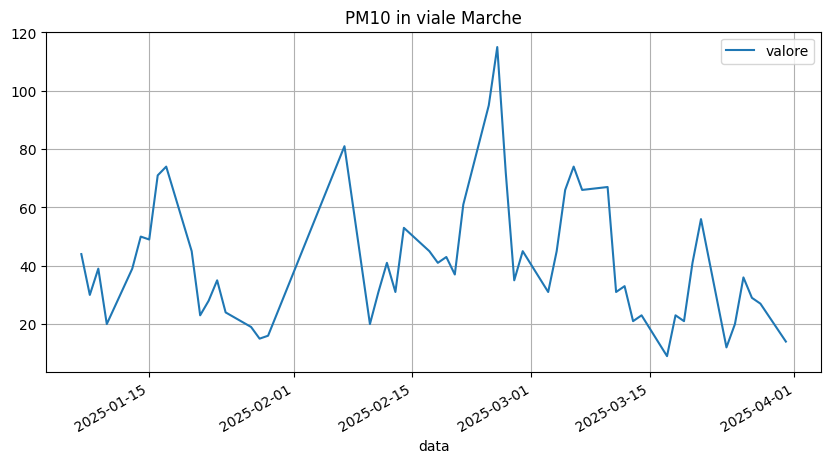

In [79]:
df_inquinanti.loc[(df_inquinanti['nome stazione'] == 'viale Marche') & (df_inquinanti['inquinante'] == 'PM10')].plot(x='data', y='valore', title='PM10 in viale Marche', figsize=(10, 5), grid=True)

Faccio una pivot table per poter avere le date sull'asse delle X, il valore medio di un inquinante scelto,  (PM10) sullìasse delle Y e un grafico per ogni stazione.

In [80]:
# Recupero prima l'inquinante PM10
df_pm10 = df_inquinanti[df_inquinanti['inquinante'] == 'PM10']

# Crea la pivot table
df_pm10_stazioni = df_pm10.pivot_table(
    index='data',
    columns='nome stazione',
    values='valore',
    aggfunc='mean'
)


In [81]:
df_pm10_stazioni.head()


nome stazione,Verziere,via Pascal,via Senato,viale Marche
data,,,,
2025-01-07,40.0,40.0,35.0,44.0
2025-01-08,28.0,24.0,28.0,30.0
2025-01-09,36.0,36.0,34.0,39.0
2025-01-10,16.0,17.0,18.0,20.0
2025-01-13,27.0,30.0,29.0,39.0


<Figure size 1000x500 with 0 Axes>

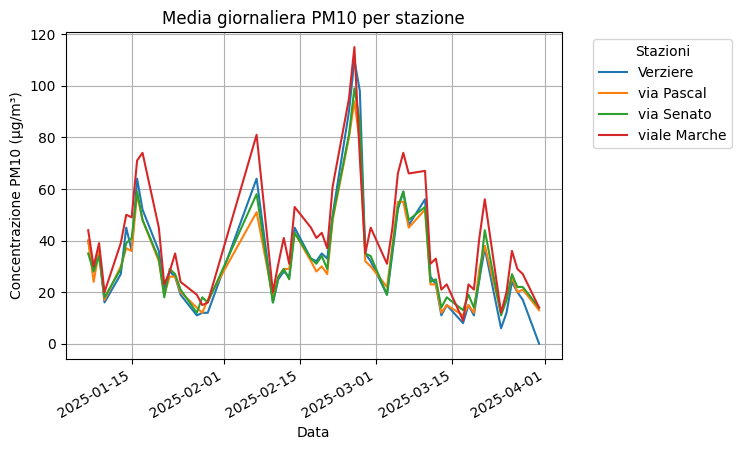

In [102]:
# Creo il grafico
plt.figure(figsize=(10, 5))
df_pm10_stazioni.plot(
    title='Media giornaliera PM10 per stazione',
    grid=True
)
plt.xlabel('Data')
plt.ylabel('Concentrazione PM10 (μg/m³)')
plt.legend(title='Stazioni', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()

Otteniamo la media dei valori degli inquinanti per tipo

In [83]:
df_inquinante_tipo=df_inquinanti.pivot_table(index='data', columns= 'inquinante', values='valore', aggfunc='mean')

In [84]:
df_inquinante_tipo.head()

inquinante,C6H6,CO_8h,NO2,O3,PM10,PM25,SO2
data,,,,,,,
2025-01-07,1.533333,0.70,29.6,20.0,39.75,30.666667,5.0
2025-01-08,1.466667,0.80,32.2,19.0,27.50,21.333333,5.0
2025-01-09,1.600000,0.80,30.6,11.0,36.25,28.000000,6.0
2025-01-10,2.333333,0.80,25.8,3.5,17.75,15.666667,2.5
2025-01-13,2.000000,1.25,77.2,50.0,31.25,23.000000,2.5


**Ora confrontiamo anche di quanto i picchi di inquinanti hanno superato i valori massimi consentiti in Italia creando un nuovo dataframe**

Effettuo prima un merge tra i deu dataframe

In [85]:
df_merge_inquinanti = pd.merge(df_inquinanti, df_limiti_inquinanti, on='inquinante', how='left')

In [86]:
df_merge_inquinanti.head()

,data,zona,nome stazione,inquinante,valore,descrizione,valore_limite,unità
0,2025-01-07,Nord,via Pascal,C6H6,1.4,Benzene - concentrazione media annuale,5,µg/m³
1,2025-01-07,Nord,via Pascal,NO2,28.0,Biossido di azoto - concentrazione massima oraria,200,µg/m³
2,2025-01-07,Nord,via Pascal,O3,22.0,Ozono - concentrazione massima oraria (soglia ...,180,µg/m³
3,2025-01-07,Nord,via Pascal,PM10,40.0,Polveri PM10 - concentrazione media giornaliera,50,µg/m³
4,2025-01-07,Nord,via Pascal,PM25,26.0,Polveri PM2.5 - concentrazione media annuale,25,µg/m³


Aggiungo una colonna che indica la differenza del valore dell'inquinante e il valore limite 

In [87]:
df_merge_inquinanti['superamento soglia'] = df_merge_inquinanti['valore'] - df_merge_inquinanti['valore_limite']

In [88]:
df_merge_inquinanti.head()

,data,zona,nome stazione,inquinante,valore,descrizione,valore_limite,unità,superamento soglia
0,2025-01-07,Nord,via Pascal,C6H6,1.4,Benzene - concentrazione media annuale,5,µg/m³,-3.6
1,2025-01-07,Nord,via Pascal,NO2,28.0,Biossido di azoto - concentrazione massima oraria,200,µg/m³,-172.0
2,2025-01-07,Nord,via Pascal,O3,22.0,Ozono - concentrazione massima oraria (soglia ...,180,µg/m³,-158.0
3,2025-01-07,Nord,via Pascal,PM10,40.0,Polveri PM10 - concentrazione media giornaliera,50,µg/m³,-10.0
4,2025-01-07,Nord,via Pascal,PM25,26.0,Polveri PM2.5 - concentrazione media annuale,25,µg/m³,1.0


Ricavo un grafico dal dataframe solo degli inquinanti che hanno superato la soglia nel periodo considerato

<Axes: xlabel='data'>

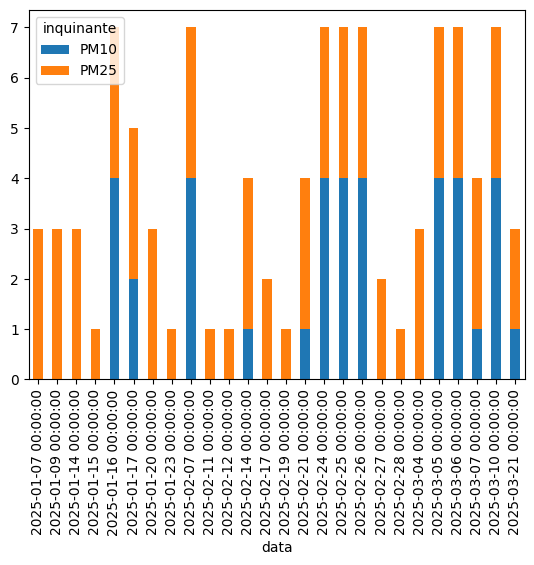

In [89]:
df_merge_inquinanti[df_merge_inquinanti['superamento soglia']>0].groupby(['data', 'inquinante']).size().unstack().plot(kind='bar', stacked=True)


Dal grafico notiamo che solo due inquinanti superano la soglia

Adesso importo un altro dataset che riguarda i ricoveri ospedalieri per poterli confrontare con i picchi degli inquinanti nelle stesse date.

In [90]:
df_ricoveri = pd.read_csv('ricoveri_ospedalieri_Milano_gennaio_marzo_2025.csv', sep=';')

In [91]:
df_ricoveri['data'] = pd.to_datetime(df_ricoveri['data'], format='%d/%m/%Y %H:%M')

In [92]:
df_ricoveri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             4200 non-null   datetime64[ns]
 1   zona             4200 non-null   object        
 2   ospedale         4200 non-null   object        
 3   diagnosi         4200 non-null   object        
 4   numero_ricoveri  4200 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 164.2+ KB


l'intento è quello di estrarre dal data frame dei ricoveri, quelli che hanno diagnosi 'problemi respiratori' e confrontando i dati, capire se c'è correlazione tra i picchi degli inquinanti e i ricoveri ospedalieri.

In [93]:
df_respiratori = df_ricoveri[df_ricoveri['diagnosi'] == 'problemi respiratori']

In [94]:
df_respiratori.head()

,data,zona,ospedale,diagnosi,numero_ricoveri
4,2025-01-07,Nord,Ospedale Niguarda,problemi respiratori,34
9,2025-01-07,Est,Policlinico di Milano,problemi respiratori,37
14,2025-01-07,Est,San Raffaele,problemi respiratori,39
19,2025-01-07,Centro,Humanitas,problemi respiratori,17
24,2025-01-07,Sud-Ovest,San Paolo,problemi respiratori,33


aggrego per date e zona i ricoveri ed effettuo la somma sui valori

In [95]:
df_ricoveri_data_zona = df_respiratori.groupby(['data', 'zona'])['numero_ricoveri'].sum().reset_index()

In [96]:
df_ricoveri_data_zona.head()

,data,zona,numero_ricoveri
0,2025-01-07,Centro,35
1,2025-01-07,Est,76
2,2025-01-07,Nord,129
3,2025-01-07,Sud-Ovest,69
4,2025-01-08,Centro,36


Aggrego inquinanti PM10 e PM25, che sono risultati quelli che hanno superato il limite, anche questi per data e zona

In [97]:
df_pm_zona = df_inquinanti[df_inquinanti['inquinante'].isin(['PM10', 'PM25'])].pivot_table(
    index=['data', 'zona'],
    columns='inquinante',
    values='valore',
    aggfunc='mean'
).reset_index()

df_pm_zona.head()

inquinante,data,zona,PM10,PM25
0,2025-01-07,Centro,40.0,NaN
1,2025-01-07,Est,44.0,37.0
2,2025-01-07,Nord,40.0,26.0
3,2025-01-07,Sud-Ovest,35.0,29.0
4,2025-01-08,Centro,28.0,NaN


effettuo il merge dei 2 dataframe creati considerando sempre data e zona con metodo inner mantenendo solo le righe che hanno corrispondenza.

In [98]:
df_data_zona_ricoveri_inq = pd.merge(
    df_pm_zona,
    df_ricoveri_data_zona,
    on=['data', 'zona'],
    how='inner'
)

df_data_zona_ricoveri_inq.head()

,data,zona,PM10,PM25,numero_ricoveri
0,2025-01-07,Centro,40.0,NaN,35
1,2025-01-07,Est,44.0,37.0,76
2,2025-01-07,Nord,40.0,26.0,129
3,2025-01-07,Sud-Ovest,35.0,29.0,69
4,2025-01-08,Centro,28.0,NaN,36


visualizzo grafici con 2 assi, inquinanti e ricoveri, per ogni zona

<Figure size 1500x700 with 0 Axes>

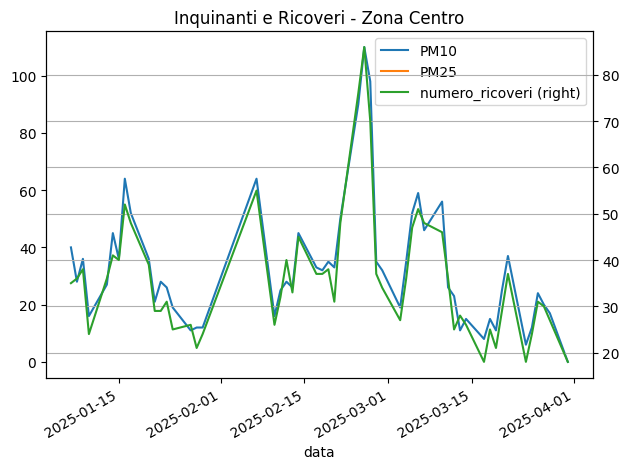

<Figure size 1500x700 with 0 Axes>

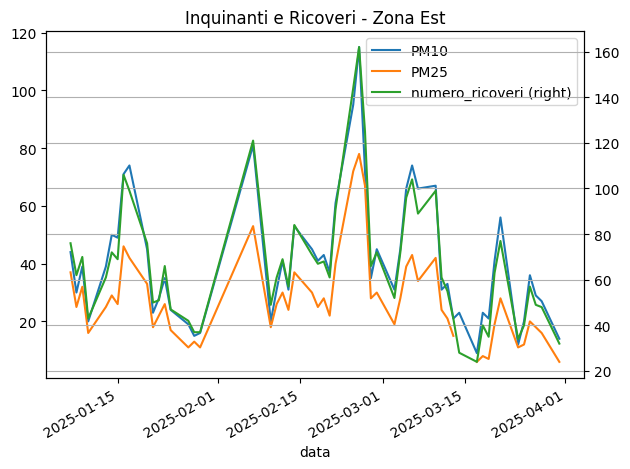

<Figure size 1500x700 with 0 Axes>

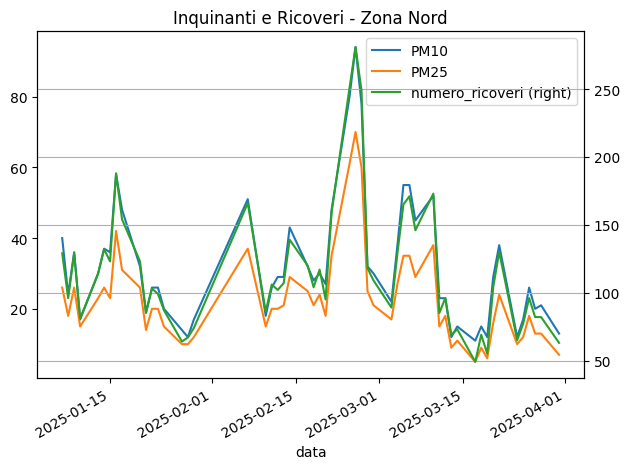

<Figure size 1500x700 with 0 Axes>

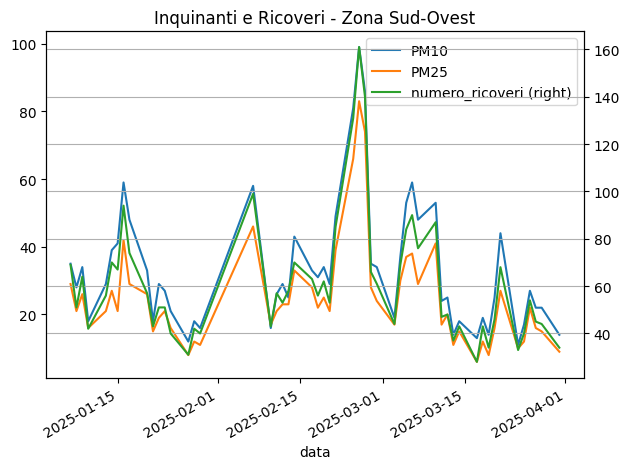

In [99]:
for zona in df_data_zona_ricoveri_inq['zona'].unique():
    plt.figure(figsize=(15, 7))
    df_zona = df_data_zona_ricoveri_inq[df_data_zona_ricoveri_inq['zona'] == zona]
    df_zona.set_index('data').plot(
        y=['PM10', 'PM25', 'numero_ricoveri'],
        secondary_y=['numero_ricoveri'],
        title=f'Inquinanti e Ricoveri - Zona {zona}',  # Aggiungo zona nel titolo
        grid=True
    )
    plt.tight_layout()
    plt.show()


Ricavo i grafici di tipo scatter con la libreria Seaborn per una visualizzazione diversa e forse più appropriata.

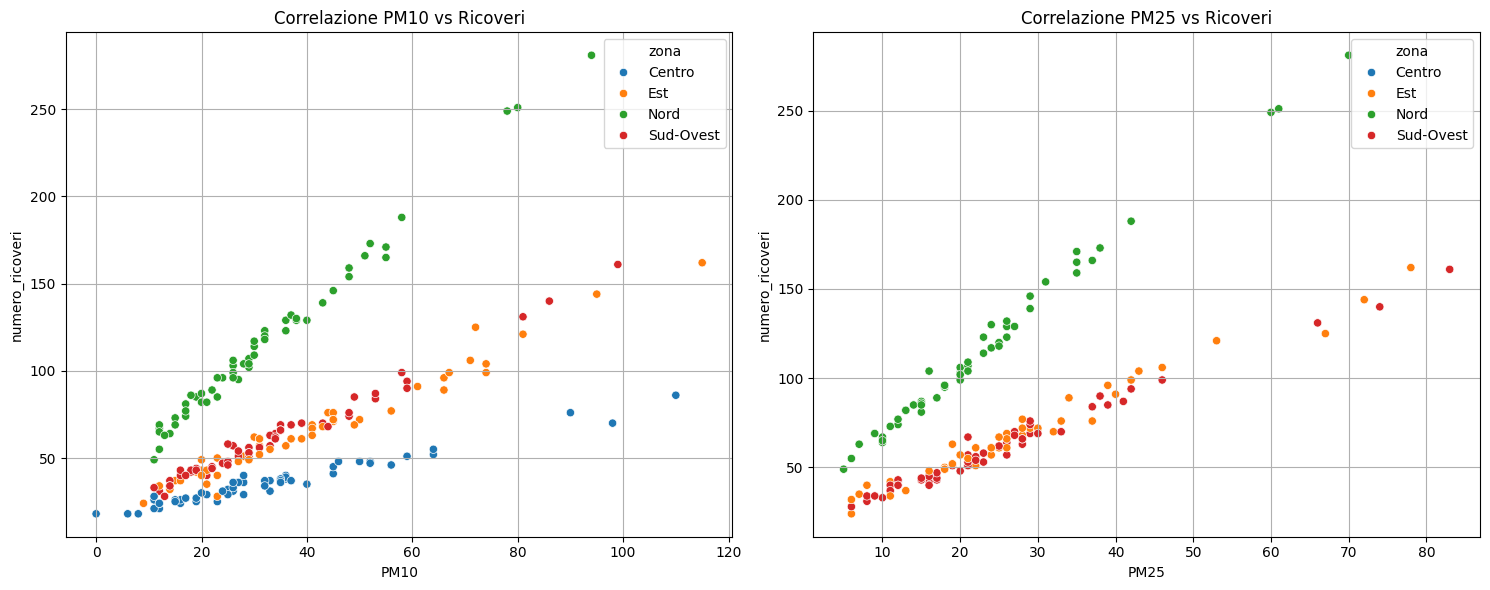

In [100]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#PM10
sns.scatterplot(
    data=df_data_zona_ricoveri_inq,
    x='PM10',
    y='numero_ricoveri',
    hue='zona',
    ax=ax1
)
ax1.set_title('Correlazione PM10 vs Ricoveri')
ax1.grid(True)

#PM25
sns.scatterplot(
    data=df_data_zona_ricoveri_inq,
    x='PM25',
    y='numero_ricoveri',
    hue='zona',
    ax=ax2
)
ax2.set_title('Correlazione PM25 vs Ricoveri')
ax2.grid(True)

plt.tight_layout()
plt.show()

I grafici sia a linee che scatter evidenziano che c'è una stretta correlazione tra i ricoveri nelle varie zone e i livelli alti di inquinanti, sia per il PM10 che per il PM25. Per il PM25 nella zona centro non ci sono stazioni predisposte per la registrazione dell'inquinante quindi non presente nei grafici.